In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set some visual styles for our plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)

# Load the dataset from the CSV file
# A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.
# You can think of it like a spreadsheet or SQL table.
df = pd.read_csv('historical_traffic_data.csv')

# Display the first 5 rows of the DataFrame to see what it looks like
df.head()

,timestamp,road_segment_id,average_speed_kph,day_of_week,hour_of_day
0,2025-08-01 00:00:00,segment_1,51.56,4,0
1,2025-08-01 00:00:00,segment_2,59.95,4,0
2,2025-08-01 00:00:00,segment_3,52.73,4,0
3,2025-08-01 00:00:00,segment_4,44.31,4,0
4,2025-08-01 00:00:00,segment_5,57.98,4,0


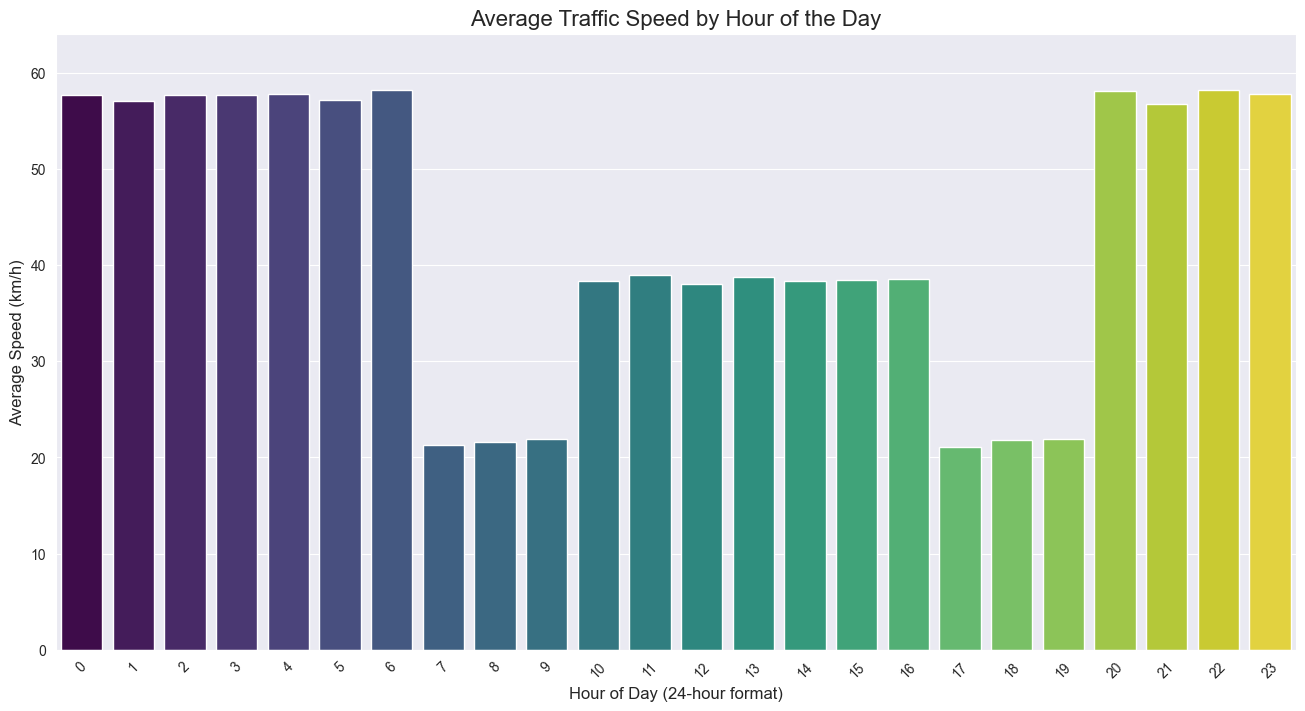

In [2]:
# --- Visualize Average Speed by Hour of Day ---

# Group the DataFrame by the 'hour_of_day' column and calculate the mean for each column.
# We are only interested in the 'average_speed_kph' column from the result.
hourly_avg_speed = df.groupby('hour_of_day')['average_speed_kph'].mean()

# Create a bar plot
plt.figure(figsize=(16, 8)) # Set the figure size for better readability
sns.barplot(x=hourly_avg_speed.index, y=hourly_avg_speed.values, hue=hourly_avg_speed.index, palette='viridis', legend=False)
# Add titles and labels for clarity
plt.title('Average Traffic Speed by Hour of the Day', fontsize=16)
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Average Speed (km/h)', fontsize=12)
plt.xticks(rotation=45) # Rotate x-axis labels if they overlap
plt.ylim(0, max(hourly_avg_speed.values) * 1.1) # Set y-axis limit for better visualization

# Display the plot
plt.show()

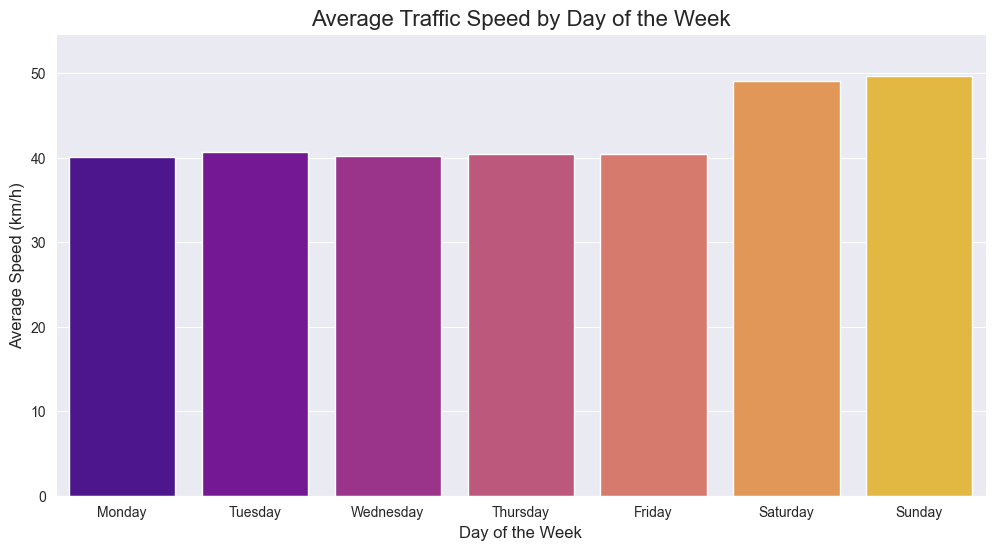

In [3]:
# --- Visualize Average Speed by Day of the Week ---

# Group by the 'day_of_week' column and calculate the mean speed
daily_avg_speed = df.groupby('day_of_week')['average_speed_kph'].mean()

# The day_of_week is numerical (0=Monday, 6=Sunday). Let's create a proper label for the chart.
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the bar plot
plt.figure(figsize=(12, 6))

# We use the corrected code with 'hue' to avoid the warning
sns.barplot(x=day_labels, y=daily_avg_speed.values, hue=day_labels, palette='plasma', legend=False)

# Add titles and labels
plt.title('Average Traffic Speed by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Speed (km/h)', fontsize=12)
plt.ylim(0, max(daily_avg_speed.values) * 1.1)

# Display the plot
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Feature Engineering and Data Splitting ---

# For our first simple model, we will use only the time-based features.
# The 'road_segment_id' is categorical, and we'll handle that in a more advanced model later.
features = ['day_of_week', 'hour_of_day']
target = 'average_speed_kph'

# Separate our data into features (X) and target (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
# test_size=0.2 means we'll use 20% of the data for testing and 80% for training.
# random_state=42 ensures that we get the same split every time we run the code,
# which is good for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the new DataFrames to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5760, 2)
Shape of X_test: (1440, 2)
Shape of y_train: (5760,)
Shape of y_test: (1440,)


In [5]:
# --- Model Training ---

# 1. Create an instance of the Linear Regression model
# This is our "untrained" model, like a blank brain.
model = LinearRegression()

# 2. Train the model using our training data
# The .fit() method is the "learning" step. The model will analyze X_train and y_train
# to learn the relationship between the features and the target.
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete!")

# 3. Make predictions on the test data
# Now that the model is trained, we ask it to predict the speed for the X_test data,
# which it has never seen before.
print("\nMaking predictions on the test set...")
y_pred = model.predict(X_test)

# 4. Display the first 5 predictions
print("First 5 predictions:", y_pred[:5])

Training the model...
Model training complete!

Making predictions on the test set...
First 5 predictions: [37.11746757 37.28476781 42.80168666 42.70637145 36.85485212]


Model Performance:
Mean Squared Error (MSE): 266.82
R-squared (R2) Score: 0.09


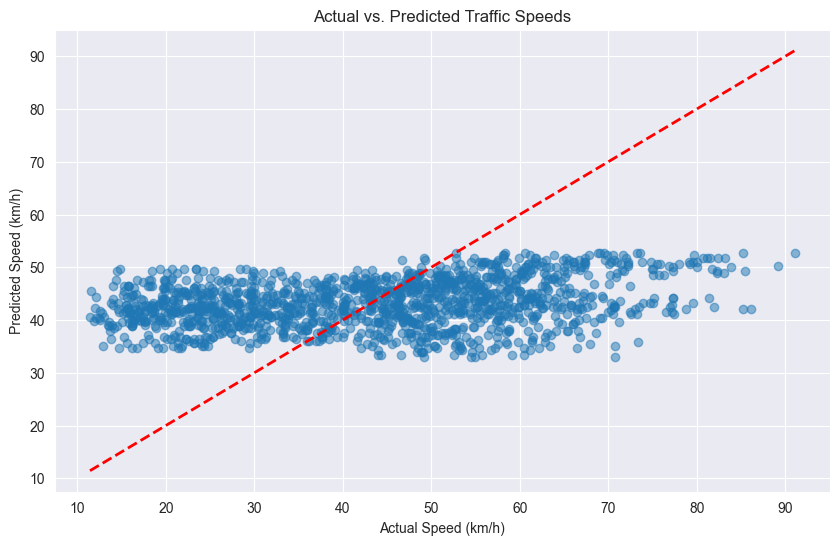

In [6]:
# --- Model Evaluation ---

# 1. Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# 2. Visualize the results
# We'll create a scatter plot of Actual Values vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Speed (km/h)")
plt.ylabel("Predicted Speed (km/h)")
plt.title("Actual vs. Predicted Traffic Speeds")

# Add a line for perfect predictions (where Actual = Predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.grid(True)
plt.show()

Training the Random Forest model... (This may take a moment)
Model training complete!

Making predictions with the new model...

--- Random Forest Model Performance ---
Mean Squared Error (MSE): 57.66
R-squared (R2) Score: 0.80


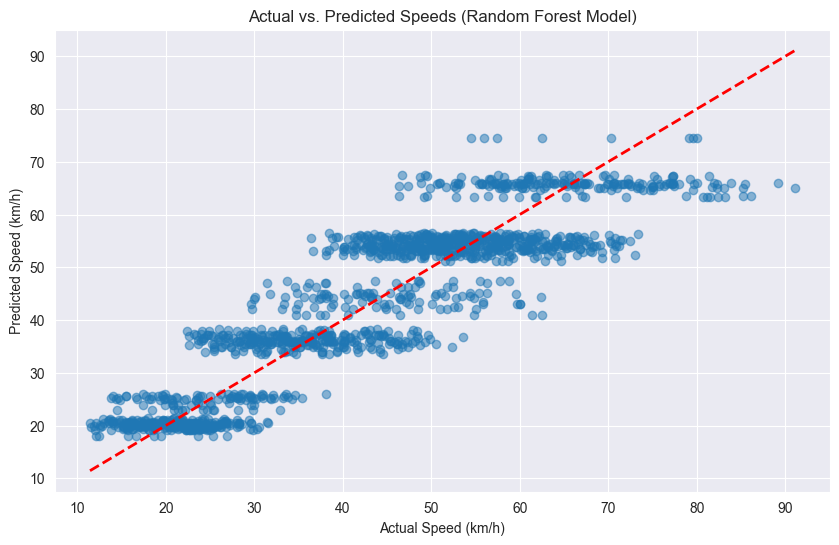

In [7]:
from sklearn.ensemble import RandomForestRegressor

# --- Train a Random Forest Model ---

# 1. Create an instance of the RandomForestRegressor model
# n_estimators=100 means it will use 100 decision trees.
# random_state=42 for reproducibility.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model
print("Training the Random Forest model... (This may take a moment)")
rf_model.fit(X_train, y_train)
print("Model training complete!")

# 3. Make predictions
print("\nMaking predictions with the new model...")
rf_y_pred = rf_model.predict(X_test)

# 4. Evaluate the new model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"\n--- Random Forest Model Performance ---")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"R-squared (R2) Score: {rf_r2:.2f}")

# 5. Visualize the new results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.xlabel("Actual Speed (km/h)")
plt.ylabel("Predicted Speed (km/h)")
plt.title("Actual vs. Predicted Speeds (Random Forest Model)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.grid(True)
plt.show()

In [8]:
import joblib

# Define the filename for our model
model_filename = 'traffic_model.joblib'

# Save the trained Random Forest model to the file
joblib.dump(rf_model, model_filename)

print(f"Model saved successfully as '{model_filename}'")

Model saved successfully as 'traffic_model.joblib'


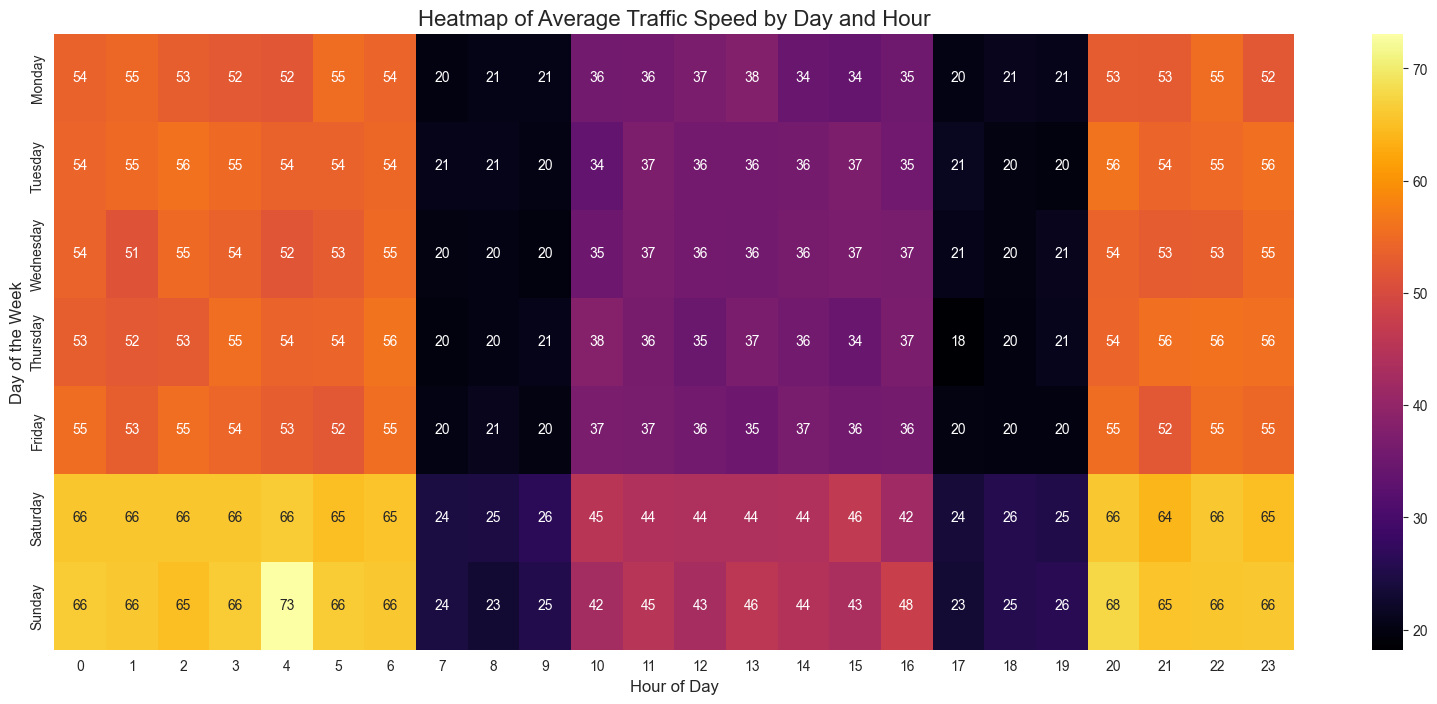

In [9]:
# --- Create a Heatmap for a comprehensive view ---

# We need to pivot the data so that hours are columns, days are rows, and speeds are the values.
pivot_table = df.pivot_table(values='average_speed_kph', index='day_of_week', columns='hour_of_day')

# The index (0-6) needs to be mapped to day names for better readability
pivot_table.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(pivot_table, cmap='inferno', annot=True, fmt=".0f")

# Add titles and labels
plt.title('Heatmap of Average Traffic Speed by Day and Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)

# Display the plot
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Feature Engineering and Data Splitting ---

# For our model, we'll use the time-based features to predict the speed.
features = ['day_of_week', 'hour_of_day']
target = 'average_speed_kph'

X = df[features]
y = df[target]

# Split data into 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully split into training and testing sets.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


# --- 2. Train the Random Forest Model ---

# Create an instance of the model.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("\nTraining the Random Forest model...")
rf_model.fit(X_train, y_train) # The model learns from the training data here.
print("Model training complete!")


# --- 3. Evaluate the Model ---

# Make predictions on the unseen test data.
y_pred = rf_model.predict(X_test)

# Calculate performance metrics.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Model Performance ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Data successfully split into training and testing sets.
Training set size: 5760 samples
Testing set size: 1440 samples

Training the Random Forest model...
Model training complete!

--- Model Performance ---
Mean Squared Error (MSE): 57.66
R-squared (R2) Score: 0.80


In [11]:
import joblib

# Define the filename for our model
model_filename = 'traffic_model.joblib'

# Use joblib to save the trained Random Forest model (rf_model) to the file
joblib.dump(rf_model, model_filename)

print(f"Model saved successfully to '{model_filename}'")

Model saved successfully to 'traffic_model.joblib'


In [13]:
# --- Step 1: Load the new, location-aware dataset ---
df_v2 = pd.read_csv('historical_traffic_data_v2.csv')

# Display the first 5 rows to confirm it loaded correctly
df_v2.head()

,timestamp,road_segment_id,average_speed_kph,day_of_week,hour_of_day
0,2025-01-01 00:00:00,segment_nh9,82.02,2,0
1,2025-01-01 00:00:00,segment_gt_road,41.60,2,0
2,2025-01-01 00:00:00,segment_indirapuram,39.61,2,0
3,2025-01-01 01:00:00,segment_nh9,75.79,2,1
4,2025-01-01 01:00:00,segment_gt_road,51.87,2,1


In [14]:
# --- Step 2: Prepare the data for the model with One-Hot Encoding ---

# Use pandas to automatically perform one-hot encoding on the 'road_segment_id' column
df_encoded = pd.get_dummies(df_v2, columns=['road_segment_id'])

# Display the first 5 rows of the newly encoded DataFrame
# Notice the new columns: road_segment_id_segment_gt_road, etc.
df_encoded.head()

,timestamp,average_speed_kph,day_of_week,hour_of_day,road_segment_id_segment_gt_road,road_segment_id_segment_indirapuram,road_segment_id_segment_nh9
0,2025-01-01 00:00:00,82.02,2,0,False,False,True
1,2025-01-01 00:00:00,41.60,2,0,True,False,False
2,2025-01-01 00:00:00,39.61,2,0,False,True,False
3,2025-01-01 01:00:00,75.79,2,1,False,False,True
4,2025-01-01 01:00:00,51.87,2,1,True,False,False


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# --- Step 3: Define Features and Target for the v2 Model ---

# The target is still the speed
target = 'average_speed_kph'

# The features now include our original time features AND the new one-hot encoded road features
# We drop the original timestamp column as it's not needed for training
features = [col for col in df_encoded.columns if col not in ['timestamp', target]]

X = df_encoded[features]
y = df_encoded[target]

# --- Step 4: Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("New dataset successfully split into training and testing sets.")
print(f"Training set size: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Testing set size: {X_test.shape[0]} samples, {X_test.shape[1]} features")


# --- Step 5: Train the New, Smarter AI Model ---
model_v2 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("\nTraining the new location-aware model (v2)...")
model_v2.fit(X_train, y_train)
print("Model training complete!")


# --- Step 6: Evaluate the v2 Model ---
y_pred_v2 = model_v2.predict(X_test)
mse_v2 = mean_squared_error(y_test, y_pred_v2)
r2_v2 = r2_score(y_test, y_pred_v2)

print(f"\n--- UrbanPulse AI Model v2 Performance ---")
print(f"Mean Squared Error (MSE): {mse_v2:.2f}")
print(f"R-squared (R2) Score: {r2_v2:.2f}")

# --- Step 7: Save the New Model ---
model_filename_v2 = 'traffic_model_v2.joblib'
joblib.dump(model_v2, model_filename_v2)
print(f"\nNew, smarter model saved successfully as '{model_filename_v2}'")

New dataset successfully split into training and testing sets.
Training set size: 14054 samples, 5 features
Testing set size: 3514 samples, 5 features

Training the new location-aware model (v2)...
Model training complete!

--- UrbanPulse AI Model v2 Performance ---
Mean Squared Error (MSE): 17.60
R-squared (R2) Score: 0.97

New, smarter model saved successfully as 'traffic_model_v2.joblib'


In [2]:
# --- FULL TRAINING PIPELINE FOR THE WEATHER-AWARE MODEL (v3) ---

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# --- Step 1: Load the new v3 dataset ---
df_v3 = pd.read_csv('historical_traffic_data_v3.csv')
print("Successfully loaded historical_traffic_data_v3.csv")
print(df_v3.head())


# --- Step 2: Feature Engineering with One-Hot Encoding for TWO columns ---
# We now have two categorical columns to convert into a numerical format.
df_encoded_v3 = pd.get_dummies(df_v3, columns=['road_segment_id', 'weather'])
print("\nDataFrame after One-Hot Encoding (new weather columns added):")
print(df_encoded_v3.head())


# --- Step 3: Define Features and Target for the v3 Model ---
target_v3 = 'average_speed_kph'
# The features now include time, one-hot encoded roads, AND one-hot encoded weather.
features_v3 = [col for col in df_encoded_v3.columns if col not in ['timestamp', target_v3]]

X_v3 = df_encoded_v3[features_v3]
y_v3 = df_encoded_v3[target_v3]


# --- Step 4: Split the Data ---
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = train_test_split(X_v3, y_v3, test_size=0.2, random_state=42)
print("\nNew dataset successfully split into training and testing sets.")
print(f"Training set has {X_train_v3.shape[0]} samples and {X_train_v3.shape[1]} features.")


# --- Step 5: Train the Final, Weather-Aware AI Model (v3) ---
model_v3 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("\nTraining the final, weather-aware model (v3)...")
model_v3.fit(X_train_v3, y_train_v3)
print("Model training complete!")


# --- Step 6: Evaluate the v3 Model ---
y_pred_v3 = model_v3.predict(X_test_v3)
mse_v3 = mean_squared_error(y_test_v3, y_pred_v3)
r2_v3 = r2_score(y_test_v3, y_pred_v3)

print(f"\n--- UrbanPulse AI Model v3 Performance ---")
print(f"Mean Squared Error (MSE): {mse_v3:.2f}")
print(f"R-squared (R2) Score: {r2_v3:.2f}")


# --- Step 7: Save the Final Model ---
model_filename_v3 = 'traffic_model_v3.joblib'
joblib.dump(model_v3, model_filename_v3)
print(f"\nFinal, most powerful model saved successfully as '{model_filename_v3}'")

Successfully loaded historical_traffic_data_v3.csv
             timestamp      road_segment_id weather  average_speed_kph  \
0  2025-01-01 00:00:00          segment_nh9    Haze              63.16   
1  2025-01-01 00:00:00      segment_gt_road    Haze              42.91   
2  2025-01-01 00:00:00  segment_indirapuram    Haze              41.83   
3  2025-01-01 01:00:00          segment_nh9   Clear              73.96   
4  2025-01-01 01:00:00      segment_gt_road   Clear              49.22   

   day_of_week  hour_of_day  
0            2            0  
1            2            0  
2            2            0  
3            2            1  
4            2            1  

DataFrame after One-Hot Encoding (new weather columns added):
             timestamp  average_speed_kph  day_of_week  hour_of_day  \
0  2025-01-01 00:00:00              63.16            2            0   
1  2025-01-01 00:00:00              42.91            2            0   
2  2025-01-01 00:00:00              41.83       